/home/oikura/Desktop/synchronization/WORK/IT/Yulia/scripts 
 ['Как работать c WHAM.pdf', 'metadata_file_generator.ipynb', 'wham_output_generator.ipynb', 'renaming_files.ipynb', 'UIWHAM_launcher.ipynb', 'spline.ipynb', '__pycache__', 'KalmanFilter.ipynb', '.ipynb_checkpoints', 'ExtractImportExportPandas.ipynb', 'MathplotlibWHAM.ipynb', 'MatplotlibUIWHAM.ipynb', 'modules', 'convertation_for_UIWHAM.ipynb', 'CombinedProgram - Visualizer.ipynb'] 
 Linux


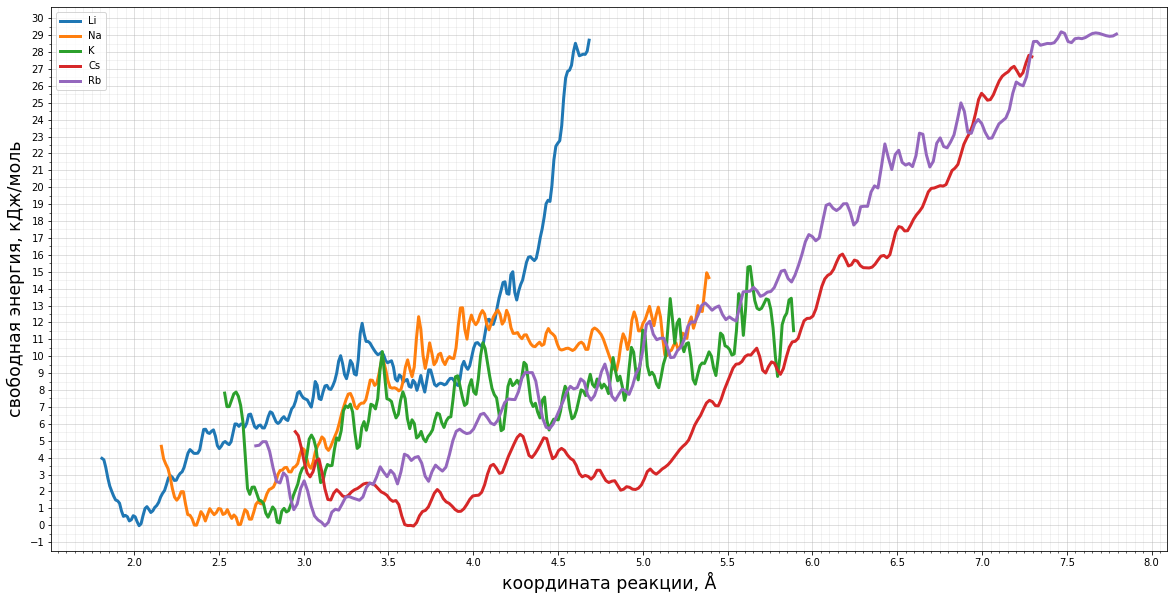

     x, Coor  y, Free
11  2.037667      0.0
    x, Coor  y, Free
9  2.355833      0.0
     x, Coor  y, Free
15  2.851333      0.0
     x, Coor  y, Free
21  3.623833      0.0
    x, Coor  y, Free
12   3.1375      0.0
    x, Coor  y, Free atom
0  2.037667      0.0   Li
1  2.355833      0.0   Na
2  2.851333      0.0    K
3  3.623833      0.0   Cs
4  3.137500      0.0   Rb


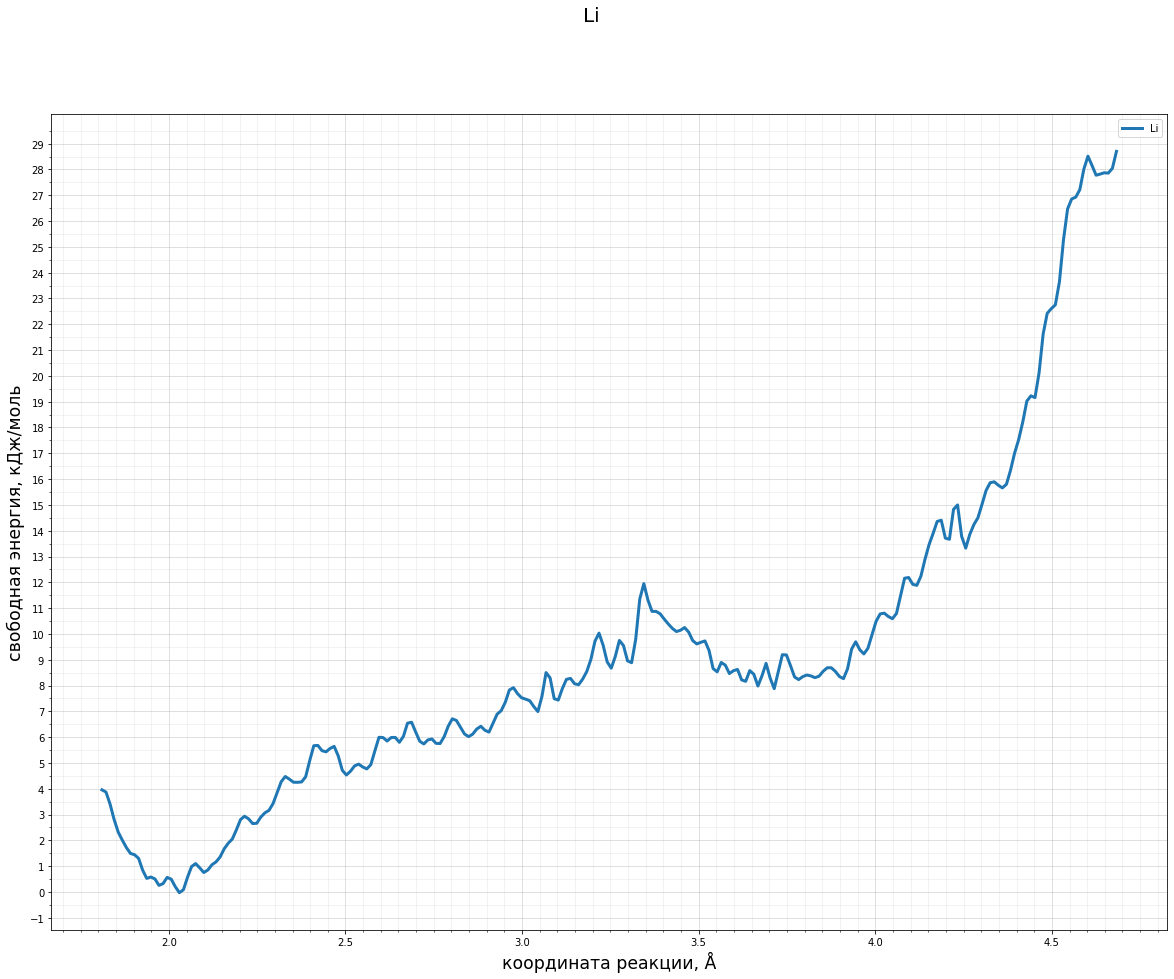

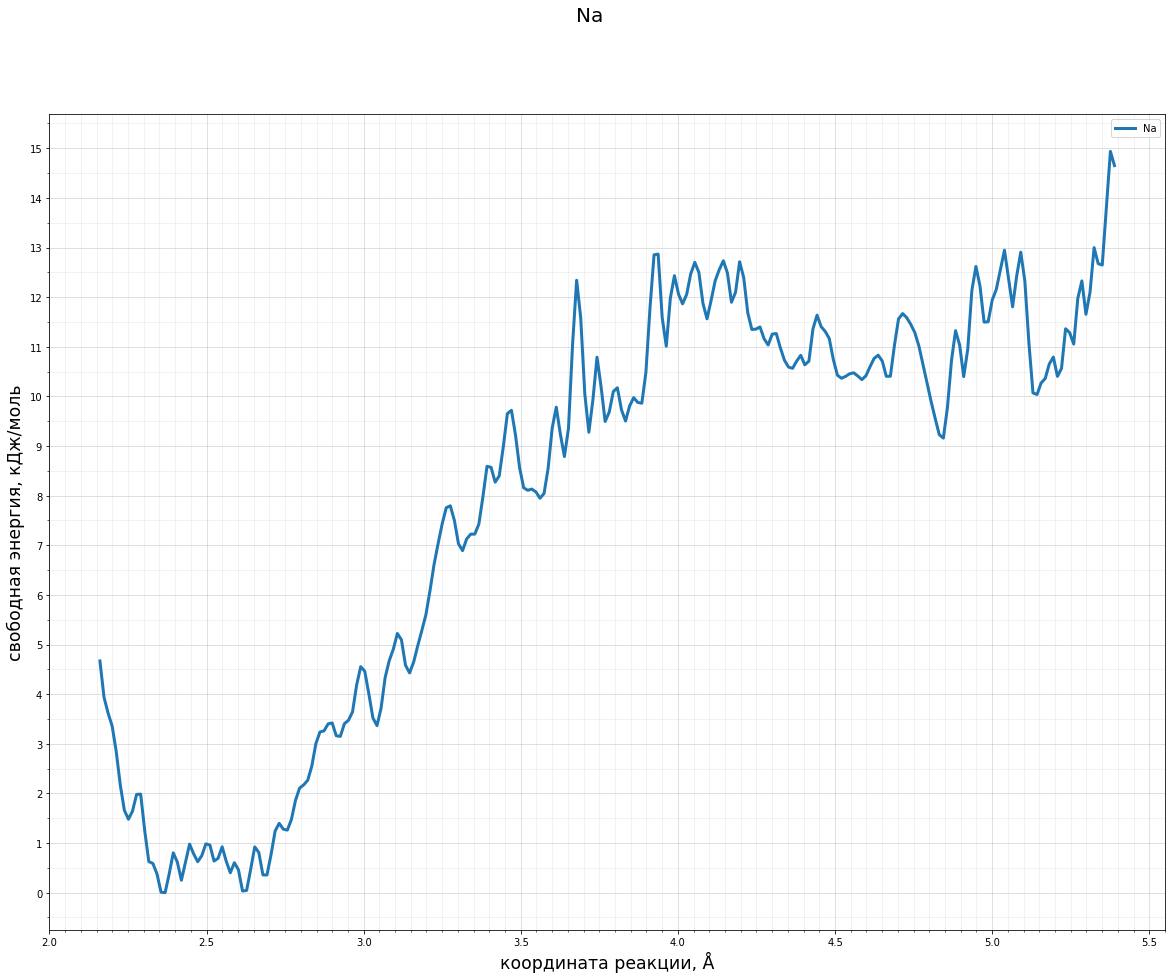

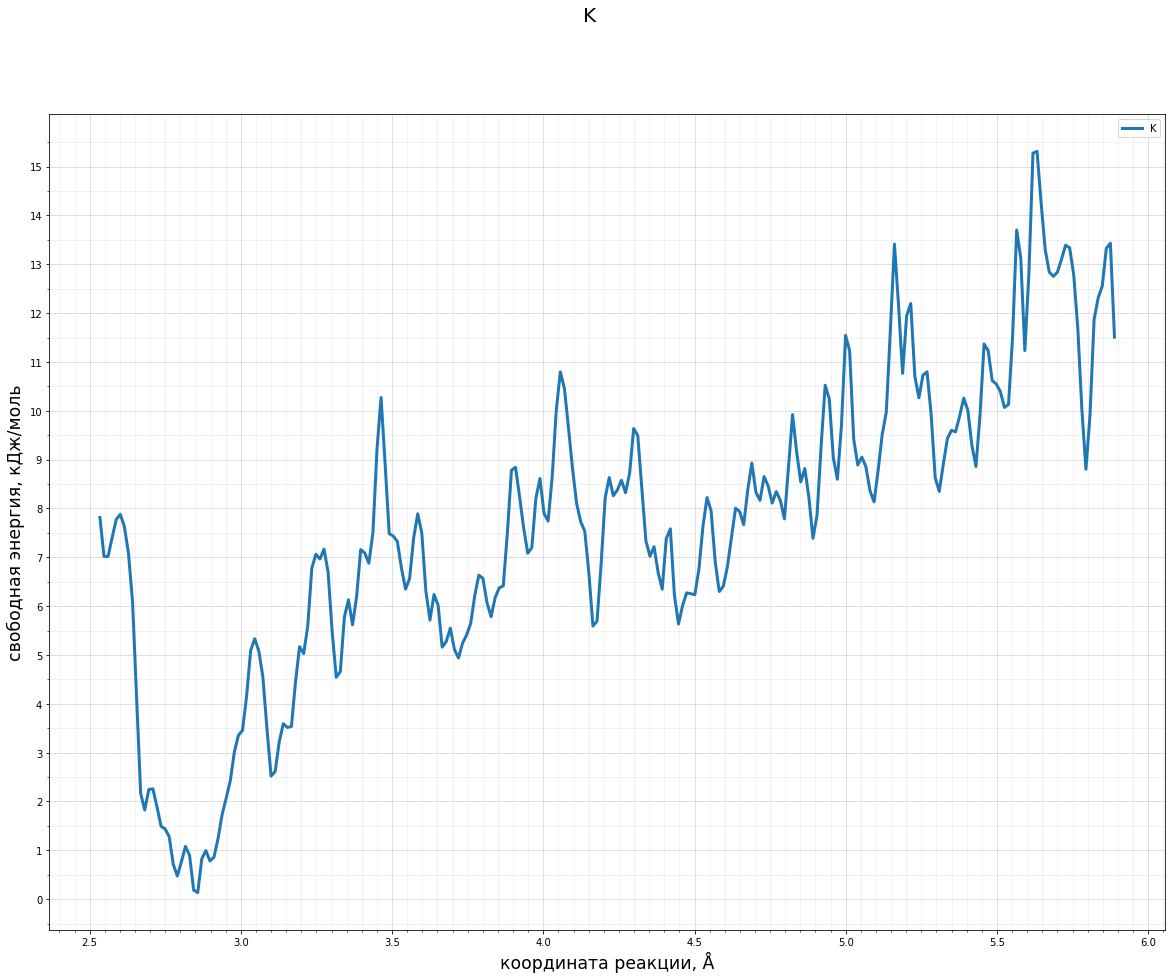

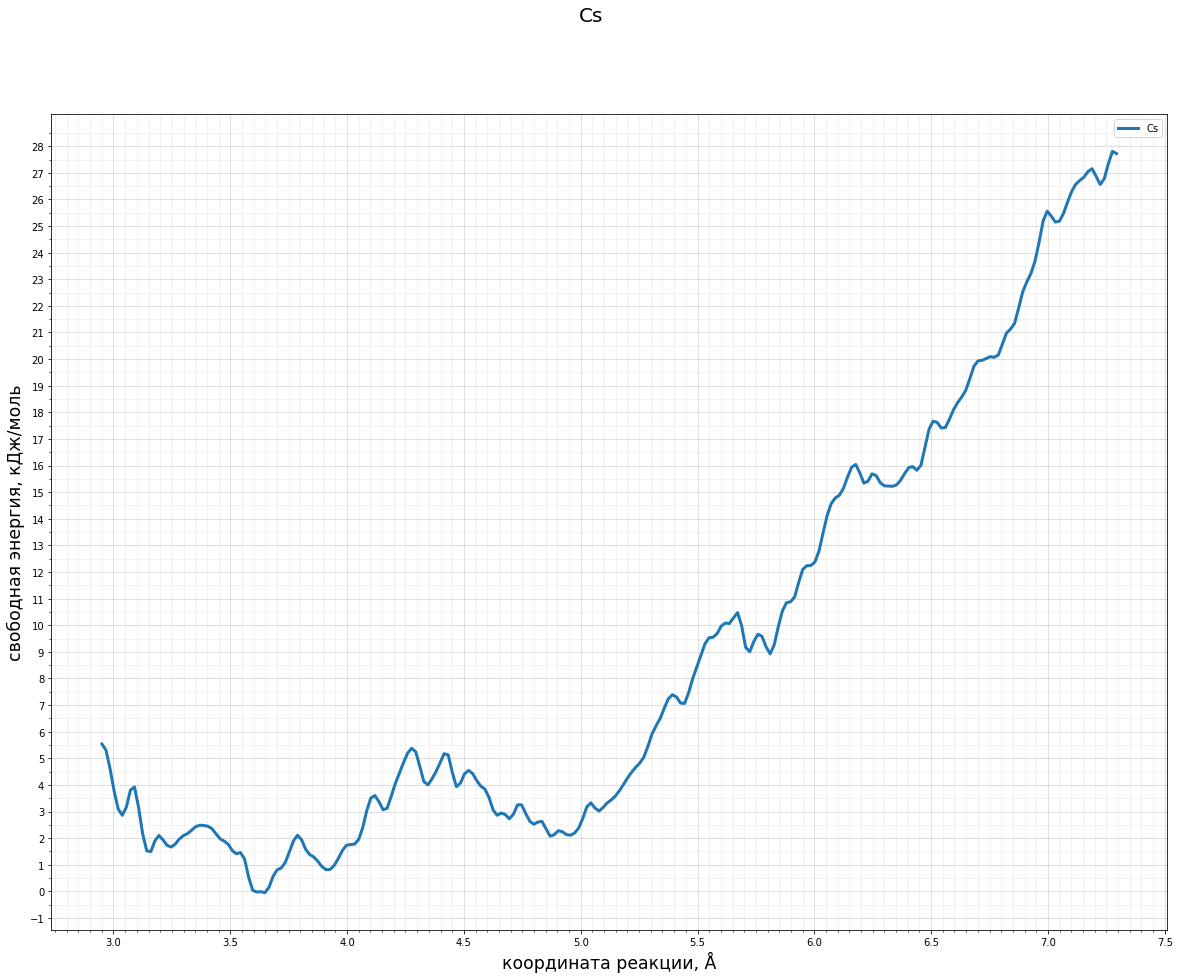

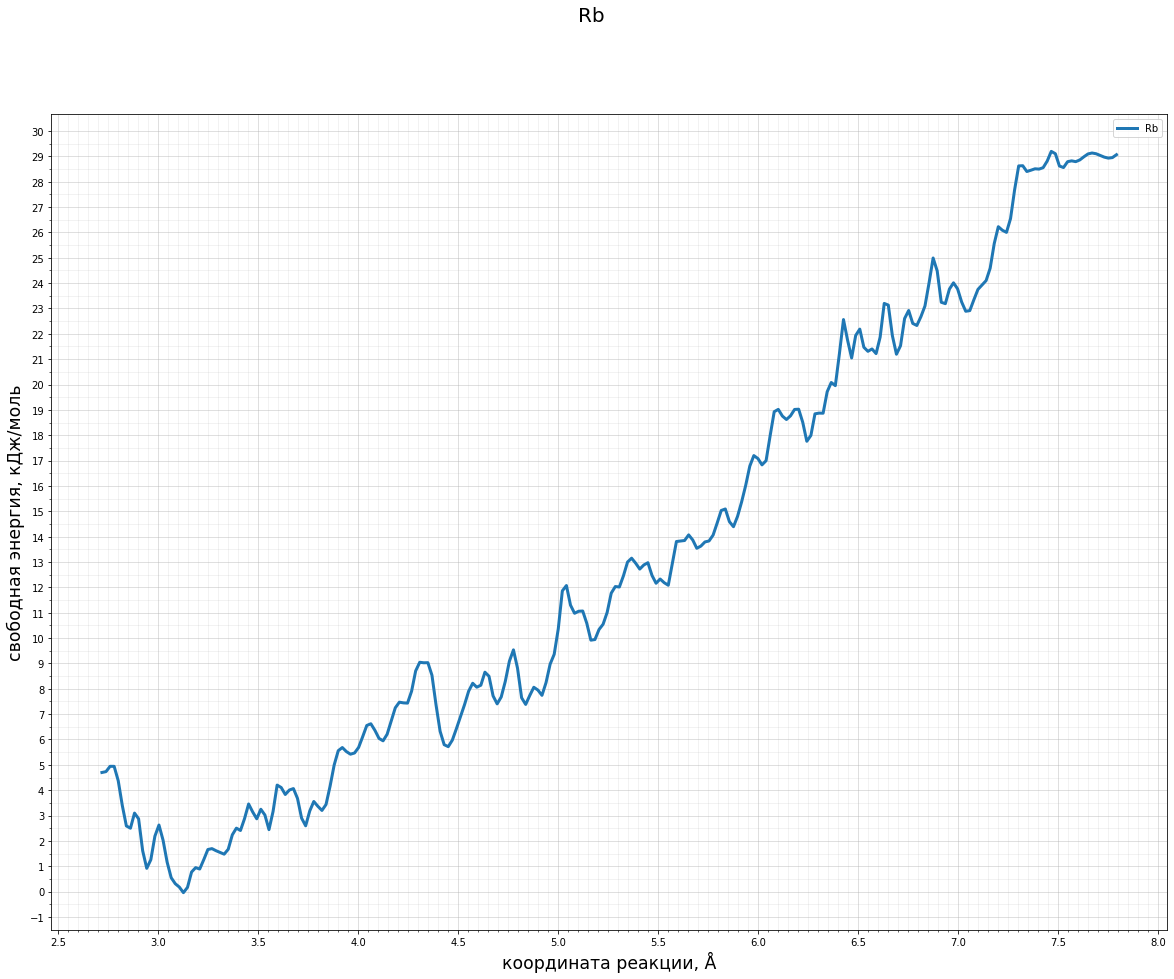

In [6]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import numpy as np
import platform
import plotly.graph_objects as go
import scipy
from scipy import signal

working_location = os.chdir("/home/oikura/Desktop/synchronization/WORK/IT/Yulia/scripts")
# current_working_location = os.chdir(working_location)
working_location = os.getcwd()
current_working_location = os.chdir(working_location)

#system detection
# platform.system()

print (working_location, "\n", os.listdir("."), "\n", platform.system())

# import statsmodels.formula.api as smf
from scipy.interpolate import make_interp_spline, BSpline

fig = plt.figure(figsize = (20,10))
ax = plt.subplot(111)

atom_list = ["Li", "Na", "K", "Cs", "Rb"]

for atom in atom_list:

    current_working_location = os.chdir("../%s/dist_out" % (atom)) # перемещение процесса в локацию не нужно и дает ошибку когда работаешь с относительными путями
    current_working_location = os.getcwd()

    #read wham output data
    data = pd.read_csv(current_working_location + "/%s.out" % (atom), sep='\s+') # без header=None так как хочу обращаться к столбцам по легенде

    #чистим данные от NaN
    data = data.fillna(0) #заполняем нулями отсутствующие данные NaN
    indexNaN = data['Prob'] == 0 #получаем датафрейм в котором в столбце Prob нули
    index_drop_NaN = data[indexNaN].index #получаем индексы строк, которые надо дропнуть
    data.drop(index_drop_NaN, inplace=True) #дропаем
    # print (data) #просмотр полученного фрейма

    graph_df = pd.DataFrame({"x, Coor": data ["#Coor"], 'y, Free': data ["Free"]}) #creating array for plotting

    graph_df=graph_df.astype(float)
    graph_df["y, Free"] = graph_df["y, Free"]*4.184 # перевели ккал/моль  в кдж/моль
    graph_df["x, Coor"] = graph_df["x, Coor"] # перевели из боров в ангстремы 
    
    graph_df.to_csv("../%s.csv" % (atom), sep="\t", header=None, index=False) #запись датафрейма в выходные файлы без хедера с разделителями-табуляцией
    graph_df=graph_df.astype(float)

######сглаживание линейными сплайнами ############################################################################33
    # вытаскиваем из датафрейма листы с переменными которые будем фиттить
    x = graph_df ["x, Coor"].to_list()
    y = graph_df ["y, Free"].to_list()
    
    major_ticks_y = np.arange(-1, graph_df["y, Free"].max()+1, 1)
    minor_ticks_y = np.arange(-1, graph_df["y, Free"].max()+1, 0.5)
    
    major_ticks_x = np.arange(-1, graph_df["x, Coor"].max()+1, 0.5)
    minor_ticks_x = np.arange(-1, graph_df["x, Coor"].max()+1, 0.05)

    ax.set_xticks(major_ticks_x)
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    
    
    xnew = np.linspace(np.array(x).min(), np.array(x).max(), 250) 
## сглаживание кривой
# кубические сплайны
    y1_smooth = scipy.interpolate.interp1d(x,y, kind = 'cubic')
    plt.plot(xnew, y1_smooth(xnew), linewidth = 3, label = atom)
   
    # показать график
    ax.legend()
    ax.grid(True)
    current_working_location = os.chdir("../")
current_working_location = os.chdir("../scripts")
# plt.suptitle('Зависимость энергии системы от расстояния катион - кислород', fontsize = 20)
plt.xlabel('координата реакции, Å', fontsize = 'xx-large')
plt.ylabel('свободная энергия, кДж/моль', fontsize = 'xx-large')

plt.show()

mindf = pd.DataFrame({})
for atom in atom_list:
    fig = plt.figure(figsize = (20,15))
    ax = plt.subplot(111)

    current_working_location = os.chdir("../%s/dist_out" % (atom)) # перемещение процесса в локацию не нужно и дает ошибку когда работаешь с относительными путями
    current_working_location = os.getcwd()

    #read wham output data
    data = pd.read_csv(current_working_location + "/%s.out" % (atom), sep='\s+') # без header=None так как хочу обращаться к столбцам по легенде

    #чистим данные от NaN
    data = data.fillna(0) #заполняем нулями отсутствующие данные NaN
    indexNaN = data['Prob'] == 0 #получаем датафрейм в котором в столбце Prob нули
    index_drop_NaN = data[indexNaN].index #получаем индексы строк, которые надо дропнуть
    data.drop(index_drop_NaN, inplace=True) #дропаем
    # print (data) #просмотр полученного фрейма

    graph_df = pd.DataFrame({"x, Coor": data ["#Coor"], 'y, Free': data ["Free"]}) #creating array for plotting
    
    graph_df=graph_df.astype(float)
    graph_df["y, Free"] = graph_df["y, Free"]*4.184 # перевели ккал/моль  в кдж/моль
    graph_df["x, Coor"] = graph_df["x, Coor"] # перевели из боров в ангстремы 
    
    graph_df.to_csv("../%s.csv" % (atom), sep="\t", header=None, index=False) #запись датафрейма в выходные файлы без хедера с разделителями-табуляцией
    graph_df=graph_df.astype(float)
    
    # Major ticks every 20, minor ticks every 5
    major_ticks_y = np.arange(-1, graph_df["y, Free"].max()+1, 1)
    minor_ticks_y = np.arange(-1, graph_df["y, Free"].max()+1, 0.5)
    
    major_ticks_x = np.arange(-1, graph_df["x, Coor"].max()+1, 0.5)
    minor_ticks_x = np.arange(-1, graph_df["x, Coor"].max()+1, 0.05)

    ax.set_xticks(major_ticks_x)
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

######сглаживание сплайнами ############################################################################
    # вытаскиваем из датафрейма листы с переменными которые будем фиттить
    x = graph_df ["x, Coor"].to_list()
    y = graph_df ["y, Free"].to_list()
    
    mindf = mindf.append(graph_df.loc[graph_df['y, Free'] == 0])

## 300 represents number of points to make between T.min and T.max
    xnew = np.linspace(np.array(x).min(), np.array(x).max(), 250) 
# кубические сплайны
    y1_smooth = scipy.interpolate.interp1d(x,y, kind = 'cubic')
    plt.plot(xnew, y1_smooth(xnew), linewidth = 3, label = atom)
    
    print(graph_df.loc[graph_df['y, Free'] == 0])
    
    # показать график
    plt.legend()
    plt.grid(True)
    current_working_location = os.chdir("../")
    plt.suptitle('%s' % (atom), fontsize = 20)
    plt.xlabel('координата реакции, Å', fontsize = 'xx-large')
    plt.ylabel('свободная энергия, кДж/моль', fontsize = 'xx-large')
    ax.legend()
    ax.grid(True)

#     plt.show()
current_working_location = os.chdir("../scripts")
mindf["atom"] = atom_list
mindf = mindf.reset_index(drop=True)
print (mindf)


In [13]:
print (os.getcwd())

/home/oikura/Desktop/synchronization/WORK/IT/Yulia/scripts
